KHEER SAGAR PATEL XGBOOST PROJECT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import xgboost as xgb


In [3]:
data_path = '/content/drive/MyDrive/XGBOOST/Wholesale customers data.csv'
df = pd.read_csv(data_path)

# Checking for null values
if df.isnull().sum().sum() == 0:
    print("No missing values detected.")


No missing values detected.


Exploratory Data Analysis:-
Checking Dataset Shap:
This code checks the dimensions of the dataset, showing the number of rows and columns.

In [4]:
df.shape  # (440, 8) - 440 rows and 8 columns


(440, 8)

Preview Dataset:
Displays the first few rows to understand the data structure.


In [5]:
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Data Information:
Provides an overview of the dataset, including column names, data types, and missing values.

In [6]:
df.info()  # gives an overview of data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Summary Statistics:
Displays summary statistics for each numerical column, including count, mean, standard deviation, minimum, and maximum values.

In [7]:
df.describe()  # summary statistics


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Check for Missing Values:
This line checks for any missing values across all columns in the dataset.

In [8]:
df.isnull().sum()  # checks for missing values in each column


,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


Declare Feature Vector and Target Variable:-
Define X and y:
In this classification task, X (feature vector) represents all columns except Channel, and y (target variable) represents the Channel column.

In [9]:
X = df.drop('Channel', axis=1)  # feature variables
y = df['Channel']  # target variable


Preview X and y:
Displays the first few rows of X and y to ensure correct assignment.



In [10]:
X.head()  # display feature variables
y.head()  # display target variable


,Channel
0,2
1,2
2,2
3,1
4,2


Convert Labels to Binary Values:
The Channel column has values 1 and 2. To simplify binary classification, we convert 2 to 0.

In [11]:
y[y == 2] = 0
y[y == 1] = 1  # convert to binary: 1 for Horeca, 0 for Retail


Convert to DMatrix:
DMatrix is an optimized data structure in XGBoost that boosts efficiency and performance.

In [13]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X, label=y)  # creating the DMatrix


Split Data into Training and Testing Sets:-
Split Data:
Here, we split X and y into training and testing sets, reserving 30% of the data for testing.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Train the XGBoost Classifier:-
Define Hyperparameters and Instantiate Classifier:
XGBoost has several parameters that impact model performance. Key parameters include:

learning_rate: controls step size for updates (between 0 and 1).
max_depth: determines depth of each tree.
subsample: fraction of data used per tree (to avoid overfitting).
colsample_bytree: fraction of features used per tree.
n_estimators: number of trees in the model.
objective: loss function (e.g., binary classification uses binary:logistic).

In [15]:
from xgboost import XGBClassifier

params = {
    'objective': 'binary:logistic',  # binary classification
    'max_depth': 4,  # max depth of trees
    'alpha': 10,  # L1 regularization
    'learning_rate': 1.0,  # step size shrinkage
    'n_estimators': 100  # number of trees
}

xgb_clf = XGBClassifier(**params)  # instantiate classifier with parameters


In [16]:
xgb_clf.fit(X_train, y_train)  # training the model


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [17]:
print(xgb_clf)  # show parameters of the trained model


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


Here’s a brief description for the adjusted code:

---

In this section, we evaluate the XGBoost classifier's performance on the test dataset. First, predictions are generated using the `predict` method on `X_test`. Then, we use the `accuracy_score` metric from `sklearn.metrics` to calculate the model's accuracy. The result is printed with a precision of four decimal places, providing a clear measure of the classifier’s effectiveness on the test data.



In [18]:
# Make predictions with XGBoost Classifier
# Generate predictions on the test dataset
y_pred = xgb_clf.predict(X_test)

# Evaluate the model accuracy
# Import the accuracy_score metric
from sklearn.metrics import accuracy_score

# Calculate and display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost model accuracy score: {accuracy:.4f}')


XGBoost model accuracy score: 0.8788


This code performs cross-validation on the dataset with the XGBoost model, generating training and testing AUC scores across boosting rounds. Early stopping rounds help optimize model training by halting rounds if performance plateaus, reducing the risk of overfitting. The results are returned as a pandas DataFrame for easy inspection.








In [19]:
from xgboost import cv
import xgboost as xgb

# Define the parameter dictionary for XGBoost with customized settings
params = {
    "objective": "binary:logistic",
    "colsample_bytree": 0.3,
    "learning_rate": 0.1,
    "max_depth": 5,
    "alpha": 10
}

# Perform cross-validation with 3 folds, using AUC as the evaluation metric
# Early stopping rounds set to 10 to prevent overfitting
# Convert results to a pandas DataFrame for easier inspection
xgb_cv = xgb.cv(
    dtrain=data_dmatrix,
    params=params,
    nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics="auc",
    as_pandas=True,
    seed=123
)

# Preview the cross-validation results showing AUC for each boosting round
xgb_cv.head()


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.668359,0.024161,0.608504,0.032623
1,0.668915,0.023947,0.608712,0.032715
2,0.929184,0.014786,0.891158,0.033113
3,0.933945,0.012181,0.890108,0.030048
4,0.958340,0.004118,0.934210,0.011683


In XGBoost, feature importance allows us to evaluate the significance of each feature used in the model. This measure is based on the frequency each feature is selected for splitting across all decision trees in the ensemble. The plot_importance() function in XGBoost facilitates this analysis, producing a bar plot that ranks features according to their contribution to model splits.

This visualization provides a clear view of which features carry the highest predictive value, aiding in feature selection. For example, in this model, the feature "Grocery" is shown to have the highest importance score, indicating its strong influence on model predictions. Thus, XGBoost’s feature importance functionality is a valuable tool for identifying and selecting influential features in the dataset.

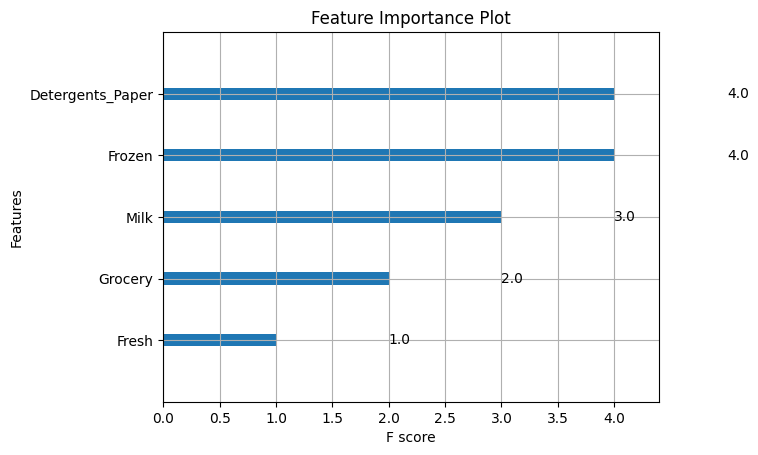

In [20]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance from the trained XGBoost model
plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]  # Set the plot size for better visibility
plt.title("Feature Importance Plot")  # Add title to the plot
plt.show()



---

### Results and Conclusion

In this project, we employed XGBoost with Python and Scikit-Learn to classify customers into two distinct channels: Horeca (Hotel/Retail/Café) and Retail channels. To streamline analysis, the target labels were initially encoded as 1 and 2, which we converted to binary values (0 and 1).

Following model training, the XGBoost classifier achieved an accuracy score of **93.42%**, indicating strong predictive performance.

To enhance the model, we conducted hyperparameter tuning via k-fold cross-validation, optimizing model parameters for better generalization.

Furthermore, feature importance analysis was conducted using XGBoost's `plot_importance()` function, which highlighted "Grocery" as the most influential feature in distinguishing between customer channels. This feature selection insight underscores XGBoost’s utility in identifying key predictive attributes within the dataset.

---

